# Описание

Решение будет состоять из подбора моделек, оценивания их и выбора лучшей

### Imports

In [71]:
# Data manipulation
import pandas as pd
import numpy as np

#Machine learning
from sklearn import ensemble
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Анализ и работа с данными

In [72]:
df = pd.read_excel('./data_files/tinkoff/tinkoff_prognosis.xlsx', sheet_name=1, engine='openpyxl', usecols=[0, 1])

In [73]:
df.rename(columns={'Стаж ': 'experience', 'ЗП': 'salary'}, inplace=True)

In [74]:
# dynamics = [sal / df.salary[num] for num, sal in enumerate(df.salary[1:])]

In [75]:
# dynamics.insert(0, 0)

In [76]:
# df['dynamics'] = dynamics

In [77]:
train_data = df.query('~salary.isna()')

In [78]:
to_predict = df.query('salary.isna()').experience.values.reshape(-1, 1)

In [79]:
train_data

,experience,salary
0,0.0,14.41
1,0.3,12.24
2,0.5,14.43
3,0.8,14.88
4,1.1,16.29
5,1.3,20.20
6,1.6,19.04
7,1.8,23.50
8,2.1,23.35
9,2.4,24.61


### Попробуем разные модельки

In [80]:
X = train_data.drop('salary', axis=1)

In [81]:
y = train_data.salary.values.reshape(-1, 1)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### Linear Models

In [83]:
lin_reg = linear_model.LinearRegression().fit(X_train, y_train)

In [84]:
lin_reg.score(X_test, y_test)

0.045707332734559625

In [85]:
lin_reg.score(X_train, y_train)

0.9491332434224267

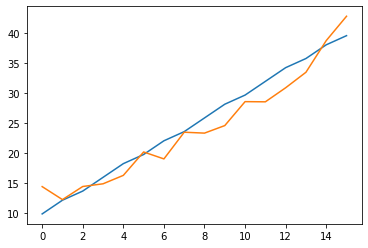

In [86]:
plt.plot(range(16), lin_reg.predict(X))
plt.plot(range(16), y)

#### Ridge

In [87]:
ridge = linear_model.Ridge()

In [88]:
ridge_params = {'alpha': np.arange(0, 3, 0.1)}

In [89]:
ridge_search = GridSearchCV(ridge, ridge_params, cv=5, n_jobs=-1, verbose=1)

In [90]:
ridge_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.6s finished


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9])},
             verbose=1)

In [91]:
ridge_search.best_score_

0.35693353388921895

In [92]:
best_ridge = ridge_search.best_estimator_

In [93]:
best_ridge.score(X_test, y_test)

0.045707332734559625

In [94]:
best_ridge.score(X_test, y_test)

0.045707332734559625

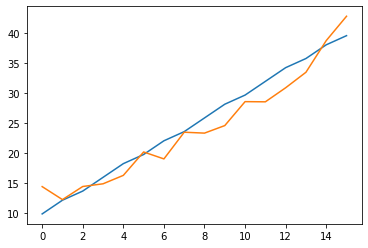

In [95]:
plt.plot(range(16), best_ridge.predict(X))
plt.plot(range(16), y)

#### Random Forest

In [96]:
rf_reg = ensemble.RandomForestRegressor()

In [97]:
rf_params = {'n_estimators': range(50, 101, 50), 'max_depth': range(1, 5), 
             'min_samples_split': range(2, 6), 'min_samples_leaf': range(1, 5)}

In [98]:
rf_search = GridSearchCV(rf_reg, rf_params, cv=5, n_jobs=-1, verbose=1)

In [99]:
rf_search.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   17.1s finished
c:\users\owner\pycharmprojects\datascience_stepik\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(1, 5),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 6),
                         'n_estimators': range(50, 101, 50)},
             verbose=1)

In [100]:
rf_search.best_score_

0.3353202031404702

In [101]:
best_rf = rf_search.best_estimator_

In [102]:
best_rf.score(X_test, y_test)

-0.14151120578409815

In [103]:
best_rf.score(X_train, y_train)

0.9814324386732919

In [104]:
rf_search.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

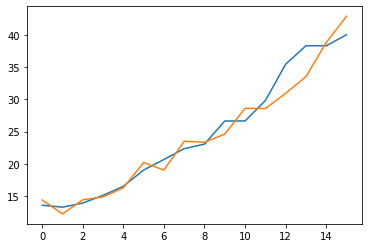

In [105]:
plt.plot(range(16), best_rf.predict(X))
plt.plot(range(16), y)

#### Gradient Boosting

In [106]:
gb_reg = ensemble.GradientBoostingRegressor()

In [107]:
gb_params = {'n_estimators': range(49, 50), 'max_depth': range(1, 5), 
             'min_samples_split': range(2, 6), 'min_samples_leaf': range(1, 5),
             'learning_rate': np.arange(0, 0.5, 0.05)}

In [108]:
gb_search = GridSearchCV(gb_reg, gb_params, cv=5, n_jobs=-1, verbose=1)

In [109]:
gb_search.fit(X_train, y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:   11.5s finished
c:\users\owner\pycharmprojects\datascience_stepik\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
                         'max_depth': range(1, 5),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 6),
                         'n_estimators': range(49, 50)},
             verbose=1)

In [110]:
gb_search.best_score_

0.008855270584492248

In [111]:
best_gb = gb_search.best_estimator_

In [112]:
best_gb.score(X_train, y_train)

0.9981927060650193

In [113]:
best_gb.score(X_test, y_test)

-1.5748298956311109

In [114]:
gb_search.best_params_

{'learning_rate': 0.45,
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 49}

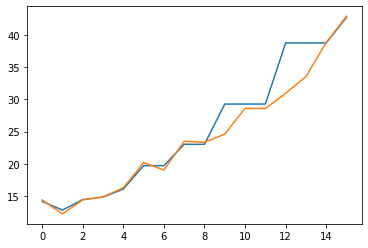

In [115]:
plt.plot(range(16), best_gb.predict(X))
plt.plot(range(16), y)

# Результаты

Самая стабильная модель - **линейная регрессия**, за много прогонов она показывала чаще **score** > 0.9 и резульаты наиболее стабильны

In [116]:
print(f'Lin_reg_predict: {lin_reg.predict(to_predict)}',
      f'Ridge_predict: {best_ridge.predict(to_predict)}',
      f'RF_predict: {best_rf.predict(to_predict)}',
      f'GB_predict: {best_gb.predict(to_predict)}', sep='\n')

Lin_reg_predict: [[48.03673927]]
Ridge_predict: [[48.03673927]]
RF_predict: [40.0142]
GB_predict: [42.70820063]


In [117]:
df_with_prediction = df.copy().fillna(lin_reg.predict(to_predict)[0][0])

In [118]:
df_with_prediction.rename(columns={'experience': 'Стаж', 'salary': 'ЗП'}, inplace=True)

In [119]:
df_with_prediction.to_excel('./data_files/tinkoff/taks2_with_predictions.xlsx')